In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c state-farm-distracted-driver-detection

100% 4.00G/4.00G [00:42<00:00, 123MB/s]
100% 4.00G/4.00G [00:42<00:00, 102MB/s]


In [4]:
!unzip /content/state-farm-distracted-driver-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56636.jpg  
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  infla

In [5]:
!pip install --upgrade  tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 72.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [6]:
!pip install split-folders

Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime

from getpass import getpass
import os
import cv2,glob

import splitfolders
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import models,layers,optimizers
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.models import load_model

In [8]:
df=pd.read_csv("driver_imgs_list.csv")

In [9]:
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [10]:
df.shape

(22424, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 525.7+ KB


In [12]:
data_dir='/content/imgs/train'
splitfolders.ratio(data_dir,output="dataa",seed=1337,ratio=(0.8,0.2),group_prefix=None,move=False)

Copying files: 22424 files [00:25, 868.24 files/s] 


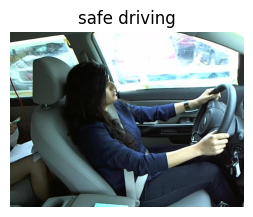

In [13]:
state = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left',
         'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger', 'UNKNOWN']

def Display(path,Class=None):
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  if Class == None:
    plt.figure()
    plt.title(state[10])
    plt.imshow(img)
    plt.axis("off")

  else:
    plt.subplot(2,5,Class+1)
    plt.title(state[Class])
    plt.imshow(img)
    plt.axis("off")


plt.figure(figsize=(20,5))
Display('/content/imgs/train/c0/img_100050.jpg',0)

## Dense Layer

In [14]:
dense_train_gen=ImageDataGenerator(rescale=1./255)
dense_train=dense_train_gen.flow_from_directory('/content/dataa/train',batch_size=128,target_size=(256,256))

dense_val_gen=ImageDataGenerator(rescale=1./255)
dense_val=dense_val_gen.flow_from_directory("/content/dataa/val",batch_size=128,target_size=(256,256))

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [15]:
model_dense=models.Sequential()
model_dense.add(Flatten(input_shape=(256,256,3)))
model_dense.add(Dense(512,activation='relu'))
model_dense.add(Dense(256,activation='relu'))
model_dense.add(Dense(128,activation='relu'))
model_dense.add(Dense(10,activation='softmax'))
model_dense.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [16]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 512)               100663808 
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 100,829,322
Trainable params: 100,829,322
Non-trainable params: 0
_________________________________________________________________


In [17]:
history_dense=model_dense.fit(dense_train,epochs=10,validation_data=dense_val)

Epoch 1/10
141/141 [==============================] - 88s 598ms/step - loss: 13.6337 - accuracy: 0.3826 - val_loss: 1.1891 - val_accuracy: 0.5572
Epoch 2/10
141/141 [==============================] - 84s 599ms/step - loss: 0.6845 - accuracy: 0.8024 - val_loss: 0.4372 - val_accuracy: 0.9087
Epoch 3/10
141/141 [==============================] - 84s 594ms/step - loss: 0.3233 - accuracy: 0.9376 - val_loss: 0.2544 - val_accuracy: 0.9506
Epoch 4/10
141/141 [==============================] - 82s 583ms/step - loss: 0.2146 - accuracy: 0.9567 - val_loss: 0.1581 - val_accuracy: 0.9722
Epoch 5/10
141/141 [==============================] - 83s 588ms/step - loss: 0.1322 - accuracy: 0.9758 - val_loss: 0.1394 - val_accuracy: 0.9693
Epoch 6/10
141/141 [==============================] - 82s 579ms/step - loss: 0.0977 - accuracy: 0.9815 - val_loss: 0.1043 - val_accuracy: 0.9777
Epoch 7/10
141/141 [==============================] - 81s 576ms/step - loss: 0.0752 - accuracy: 0.9861 - val_loss: 0.1390 - val_a

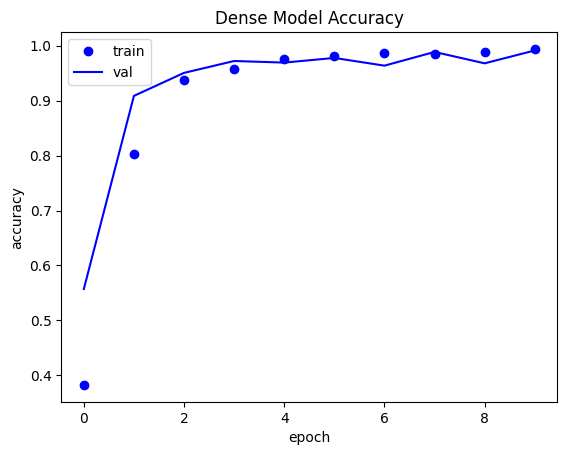

In [18]:
plt.plot(history_dense.history['accuracy'],'bo')
plt.plot(history_dense.history['val_accuracy'], 'b')
plt.title('Dense Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

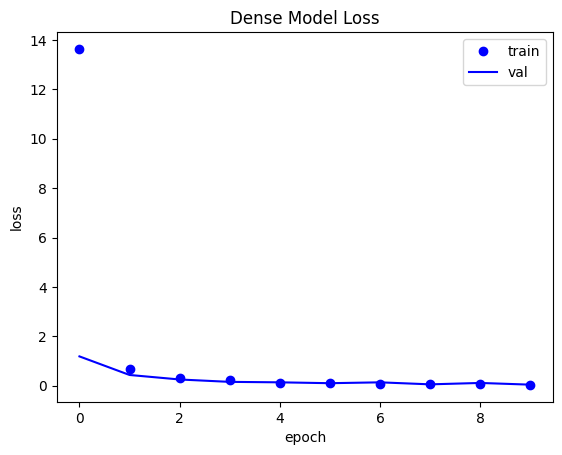

In [19]:
plt.plot(history_dense.history['loss'],'bo')
plt.plot(history_dense.history['val_loss'],'b')
plt.title('Dense Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [20]:
model_dense.save('/content/dense_model.h5')

## CNN MODEL

In [21]:
train_gen=ImageDataGenerator(rescale=1./255)
train=train_gen.flow_from_directory('/content/dataa/train',batch_size=64,target_size=(256,256))
val_gen=ImageDataGenerator(rescale=1./255)
val=val_gen.flow_from_directory('/content/dataa/val',batch_size=64,target_size=(256,256))

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [22]:
model_CNN = models.Sequential()
model_CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_CNN.add(MaxPooling2D((2, 2)))


model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))

model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))

model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))



model_CNN.add(Dense(10, activation='softmax'))


model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

In [23]:
model_CNN.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [24]:
from IPython.testing import test
history_CNN=model_CNN.fit(train,epochs=20,batch_size=64,validation_data=val)

Epoch 1/20
281/281 [==============================] - 103s 340ms/step - loss: 0.6380 - acc: 0.7953 - val_loss: 0.0833 - val_acc: 0.9788
Epoch 2/20
281/281 [==============================] - 97s 347ms/step - loss: 0.0499 - acc: 0.9859 - val_loss: 0.0517 - val_acc: 0.9851
Epoch 3/20
281/281 [==============================] - 95s 339ms/step - loss: 0.0226 - acc: 0.9941 - val_loss: 0.0304 - val_acc: 0.9931
Epoch 4/20
281/281 [==============================] - 100s 354ms/step - loss: 0.0190 - acc: 0.9941 - val_loss: 0.0576 - val_acc: 0.9844
Epoch 5/20
281/281 [==============================] - 95s 339ms/step - loss: 0.0210 - acc: 0.9940 - val_loss: 0.0245 - val_acc: 0.9929
Epoch 6/20
281/281 [==============================] - 95s 336ms/step - loss: 0.0077 - acc: 0.9979 - val_loss: 0.0188 - val_acc: 0.9944
Epoch 7/20
281/281 [==============================] - 96s 341ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0149 - val_acc: 0.9964
Epoch 8/20
281/281 [==============================] -

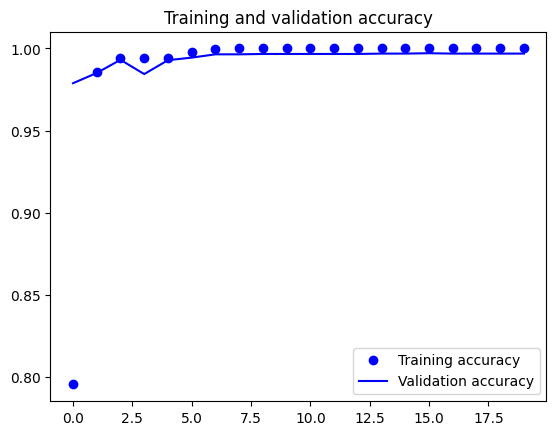

In [25]:
acc = history_CNN.history['acc']
val_acc = history_CNN.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

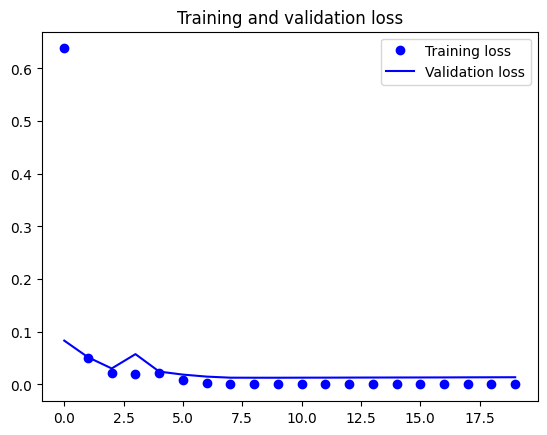

In [26]:
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
model_dense.save('/content/CNN_model.h5')

## Data Augmentation

In [28]:
batch_size=32
datagen=ImageDataGenerator(rescale=1./255,
                           zoom_range=0.05,
                           width_shift_range=0.05,
                           height_shift_range=0.05,
                           shear_range=0.05,
                           fill_mode='nearest')


train=datagen.flow_from_directory('/content/dataa/train',batch_size=64,target_size=(256,256))
val_gen=ImageDataGenerator(rescale=1./255)
val=val_gen.flow_from_directory('/content/dataa/val',batch_size=64,target_size=(256,256))

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [29]:
for data_batch,labels_batch in train:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break


data batch shape: (64, 256, 256, 3)
labels batch shape: (64, 10)


## Baseline Model

In [30]:
from keras import models,layers
from tensorflow.keras.layers import Dropout

In [31]:
model_DA=models.Sequential()
model_DA.add(layers.Conv2D(32,(3,3), activation='relu', name='Layer_1', input_shape=(256,256, 3)))
model_DA.add(layers.MaxPooling2D((2,2)))

model_DA.add(layers.Conv2D(128,(3,3),activation='relu',name='Layer_2'))
model_DA.add(layers.MaxPooling2D((2,2)))

model_DA.add(layers.Conv2D(128,(3,3),activation='relu',name='Layer_3'))
model_DA.add(layers.MaxPooling2D((2,2)))

model_DA.add(layers.Conv2D(64,(3,3),activation='relu',name='Layer_4'))
model_DA.add(layers.MaxPooling2D((2,2)))

model_DA.add(layers.Flatten())
model_DA.add(layers.Dense(512,activation='relu'))
model_DA.add(layers.Dropout(0.4))
model_DA.add(layers.Dense(10,activation='softmax'))

In [32]:
model_DA.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Conv2D)            (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 Layer_2 (Conv2D)            (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 Layer_3 (Conv2D)            (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [33]:
model_DA.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [34]:
history_DA=model_DA.fit(
    train,
    epochs=20,
    steps_per_epoch=150,
    validation_data=val,
    verbose=2,
    validation_steps=50
)

Epoch 1/20
150/150 - 189s - loss: 1.8981 - accuracy: 0.3795 - val_loss: 0.6645 - val_accuracy: 0.7878 - 189s/epoch - 1s/step
Epoch 2/20
150/150 - 187s - loss: 0.6244 - accuracy: 0.7947 - val_loss: 0.1890 - val_accuracy: 0.9475 - 187s/epoch - 1s/step
Epoch 3/20
150/150 - 183s - loss: 0.3196 - accuracy: 0.8986 - val_loss: 0.1065 - val_accuracy: 0.9694 - 183s/epoch - 1s/step
Epoch 4/20
150/150 - 185s - loss: 0.2168 - accuracy: 0.9334 - val_loss: 0.0825 - val_accuracy: 0.9781 - 185s/epoch - 1s/step
Epoch 5/20
150/150 - 189s - loss: 0.1529 - accuracy: 0.9528 - val_loss: 0.0574 - val_accuracy: 0.9828 - 189s/epoch - 1s/step
Epoch 6/20
150/150 - 184s - loss: 0.1438 - accuracy: 0.9554 - val_loss: 0.0422 - val_accuracy: 0.9856 - 184s/epoch - 1s/step
Epoch 7/20
150/150 - 187s - loss: 0.1225 - accuracy: 0.9634 - val_loss: 0.0725 - val_accuracy: 0.9781 - 187s/epoch - 1s/step
Epoch 8/20
150/150 - 187s - loss: 0.1103 - accuracy: 0.9686 - val_loss: 0.0567 - val_accuracy: 0.9837 - 187s/epoch - 1s/step


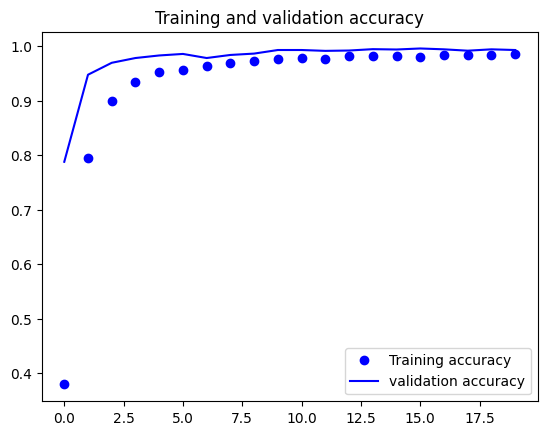

In [35]:
acc=history_DA.history['accuracy']
val_acc=history_DA.history['val_accuracy']

epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

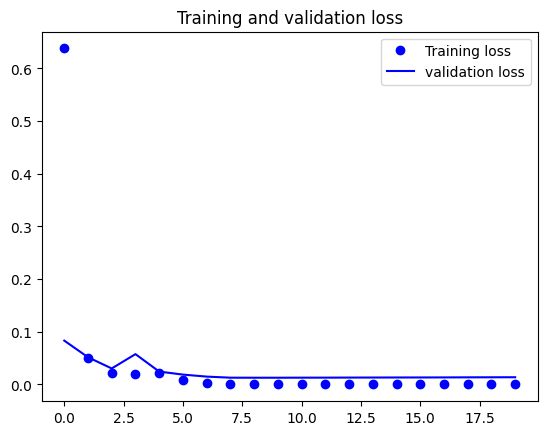

In [36]:
acc=history_DA.history['loss']
val_acc=history_DA.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()

## Frozen Model

In [37]:
batch_size = 32
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                            zoom_range=0.05,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            fill_mode="nearest")
train=datagen.flow_from_directory('/content/dataa/train',batch_size=batch_size,
                                  target_size=(256,256))
val_gen=ImageDataGenerator(preprocessing_function=preprocess_input)
val=val_gen.flow_from_directory('/content/dataa/val',batch_size=batch_size,target_size=(256,256))

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


## Build NN

In [38]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [39]:
model_DL=models.Sequential()
model_DL.add(conv_base)
model_DL.add(layers.Flatten())
model_DL.add(layers.Dense(512,activation='relu'))
model_DL.add(layers.Dropout(0.35))
model_DL.add(layers.Dense(128,activation='relu'))
model_DL.add(layers.Dropout(0.35))
model_DL.add(layers.Dense(32,activation='relu'))
model_DL.add(layers.Dense(10,activation='softmax'))

model_DL.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [40]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_DL.trainable_weights))

This is the number of trainable weights before freezing the conv base: 34


In [41]:
conv_base.trainable=False

In [42]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_DL.trainable_weights))

This is the number of trainable weights before freezing the conv base: 8


In [43]:
model_DL.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [44]:
model_DL.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_DL = model_DL.fit(train,
                    epochs=20,
                    steps_per_epoch = 150,
                    validation_data=val,
                    verbose=1)

Epoch 1/20
150/150 [==============================] - 128s 827ms/step - loss: 5.4530 - accuracy: 0.1952 - val_loss: 1.5859 - val_accuracy: 0.4408
Epoch 2/20
150/150 [==============================] - 123s 818ms/step - loss: 2.3110 - accuracy: 0.3358 - val_loss: 1.0743 - val_accuracy: 0.6739
Epoch 3/20
150/150 [==============================] - 124s 828ms/step - loss: 1.6776 - accuracy: 0.4659 - val_loss: 0.6949 - val_accuracy: 0.7964
Epoch 4/20
150/150 [==============================] - 123s 821ms/step - loss: 1.3212 - accuracy: 0.5790 - val_loss: 0.4121 - val_accuracy: 0.8813
Epoch 5/20
150/150 [==============================] - 123s 819ms/step - loss: 1.0208 - accuracy: 0.6662 - val_loss: 0.2929 - val_accuracy: 0.9116
Epoch 6/20
150/150 [==============================] - 123s 818ms/step - loss: 0.8698 - accuracy: 0.7187 - val_loss: 0.2084 - val_accuracy: 0.9379
Epoch 7/20
150/150 [==============================] - 123s 822ms/step - loss: 0.7207 - accuracy: 0.7735 - val_loss: 0.1807 -

In [45]:
train_acc,train_loss=model_DL.evaluate(train)

561/561 [==============================] - 401s 713ms/step - loss: 0.0338 - accuracy: 0.9910


In [47]:
val_acc,val_loss=model_DL.evaluate(val)

141/141 [==============================] - 34s 236ms/step - loss: 0.0297 - accuracy: 0.9918


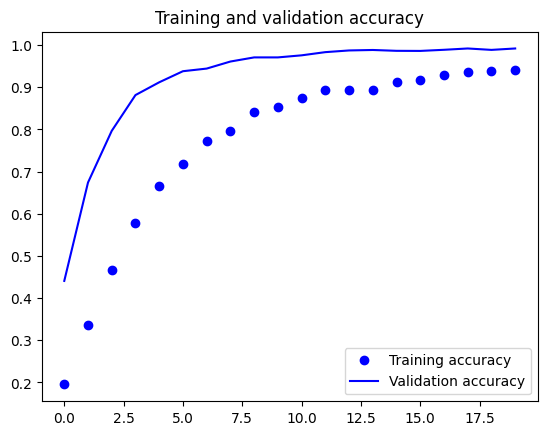

In [48]:
acc=history_DL.history['accuracy']
val_acc=history_DL.history['val_accuracy']

epochs=range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


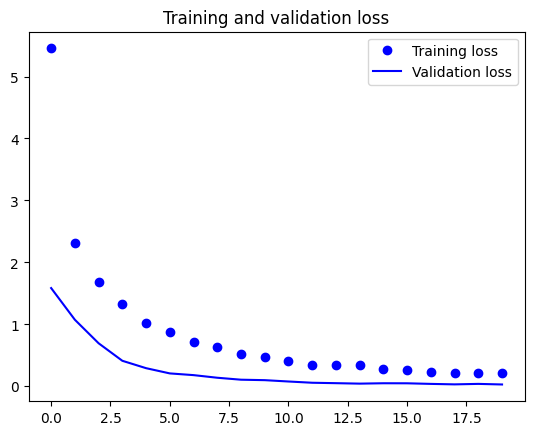

In [49]:
loss = history_DL.history['loss']
val_loss = history_DL.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
model_DL.save('/content/Frozen_Model.h5')

## Fine Tuning

In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [52]:
conv_base.trainable=True

set_trainable=False
for layer in conv_base.layers:
  if layer.name=="conv5_block1_1_conv":
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [53]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [54]:
model_copy=keras.models.clone_model(model_DL)
model_copy.build((None,150,150,3))
model_copy.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_copy.set_weights(model_DL.get_weights())

model_copy.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [55]:
model_DL.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [56]:
model_copy.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [57]:
history_FT=model_copy.fit(
    train,
    steps_per_epoch=100,
    epochs=20,
    validation_data=val,
    validation_steps=50,
    verbose=1
)

Epoch 1/20
100/100 [==============================] - 74s 726ms/step - loss: 0.2748 - accuracy: 0.9281 - val_loss: 0.0592 - val_accuracy: 0.9837
Epoch 2/20
100/100 [==============================] - 72s 722ms/step - loss: 0.2730 - accuracy: 0.9284 - val_loss: 0.0625 - val_accuracy: 0.9837
Epoch 3/20
100/100 [==============================] - 72s 715ms/step - loss: 0.2539 - accuracy: 0.9384 - val_loss: 0.0317 - val_accuracy: 0.9919
Epoch 4/20
100/100 [==============================] - 84s 841ms/step - loss: 0.2232 - accuracy: 0.9403 - val_loss: 0.0361 - val_accuracy: 0.9912
Epoch 5/20
100/100 [==============================] - 79s 782ms/step - loss: 0.2365 - accuracy: 0.9337 - val_loss: 0.0425 - val_accuracy: 0.9881
Epoch 6/20
100/100 [==============================] - 72s 715ms/step - loss: 0.2675 - accuracy: 0.9325 - val_loss: 0.0300 - val_accuracy: 0.9925
Epoch 7/20
100/100 [==============================] - 72s 719ms/step - loss: 0.2045 - accuracy: 0.9406 - val_loss: 0.0409 - val_ac

In [58]:
train_acc_FT,train_loss_FT=model_copy.evaluate(train)

561/561 [==============================] - 339s 604ms/step - loss: 0.0140 - accuracy: 0.9957


In [59]:
val_acc_FT, val_loss_FT = model_copy.evaluate(val)

141/141 [==============================] - 31s 221ms/step - loss: 0.0151 - accuracy: 0.9962


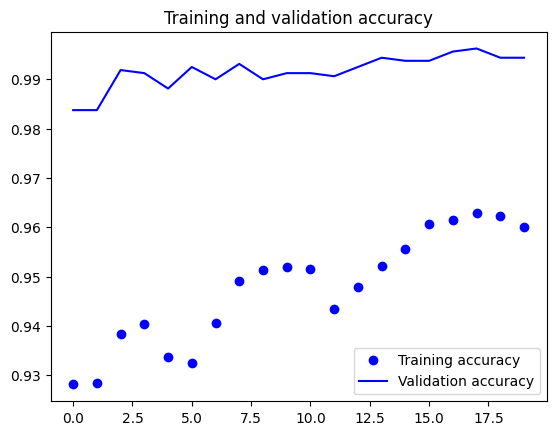

In [60]:
acc = history_FT.history['accuracy']
val_acc = history_FT.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

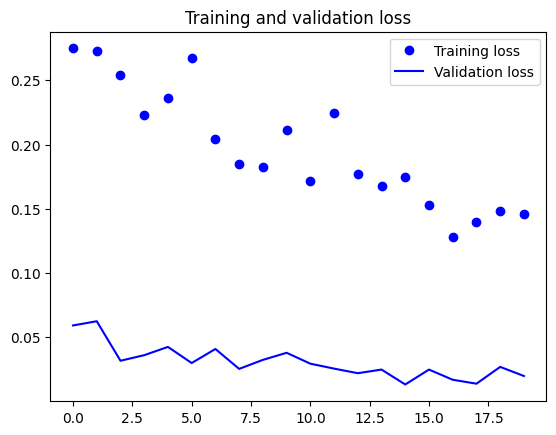

In [61]:
loss = history_FT.history['loss']
val_loss = history_FT.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Smoothing

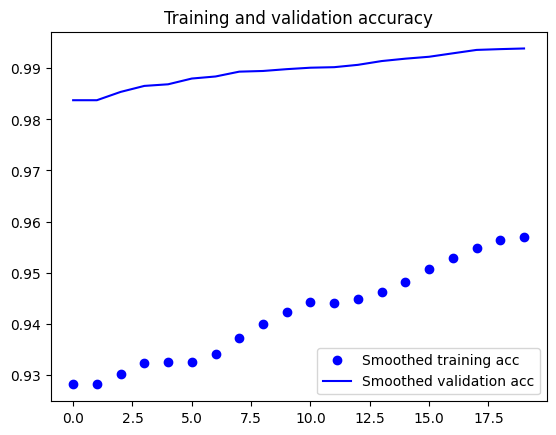

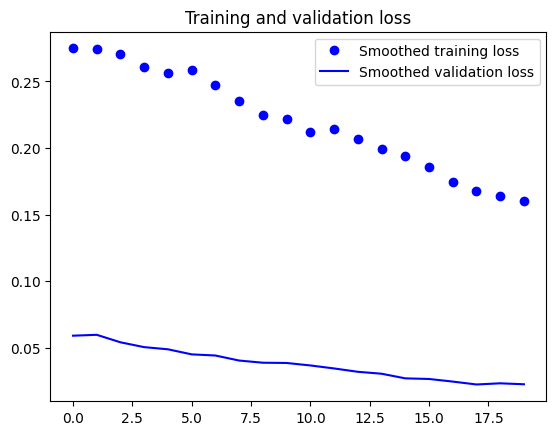

In [63]:
def smooth_curve(points,factor=0.8):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)

  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [65]:
model_copy.save('/content/driver_detection_Fine_Tuning_model2.h5')
print("Saved model to collab")

Saved model to collab


In [66]:
# # dense
acc1=history_dense.history['accuracy'][-1]
vacc1=history_dense.history['val_accuracy'][-1]
loss1=history_dense.history['loss'][-2]
vloss1=history_dense.history['val_loss'][-2]


# CNN
acc2=history_CNN.history['acc'][-1]
vacc2=history_CNN.history['val_acc'][-1]
loss2=history_CNN.history['loss'][-2]
vloss2=history_CNN.history['val_loss'][-2]

# # Data Augmentation
acc3=history_DA.history['accuracy'][-1]
vacc3=history_DA.history['val_accuracy'][-1]
loss3=history_DA.history['loss'][-2]
vloss3=history_DA.history['val_loss'][-2]

# VGG16
acc4=history_DL.history['accuracy'][-1]
vacc4=history_DL.history['val_accuracy'][-1]
loss4=history_DL.history['loss'][-2]
vloss4=history_DL.history['val_loss'][-2]

# VGG16
acc5=history_FT.history['accuracy'][-1]
vacc5=history_FT.history['val_accuracy'][-1]
loss5=history_FT.history['loss'][-2]
vloss5=history_FT.history['val_loss'][-2]

In [67]:
results = pd.DataFrame([["Dense model",acc1*100,vacc1*100,loss1,vloss1],
                       ["CNN",acc2*100,vacc2*100,loss2,vloss2],
                       ["CNN_data_augmentation",acc3*100,vacc3*100,loss3,vloss3],
                       ["Transfer Learning model",acc4*100,vacc4*100,loss4,vloss4],
                       ["Transfer Learning model_FT",acc5*100,vacc5*100,loss5,vloss5]],
                       columns = ["Model","Training Accuracy %","Validation Accuracy %", 'Loss', 'Validation Loss'])
results

,Model,Training Accuracy %,Validation Accuracy %,Loss,Validation Loss
0,Dense model,99.414521,99.131405,0.052029,0.114427
1,CNN,100.000000,99.688196,0.000002,0.013658
2,CNN_data_augmentation,98.513091,99.281251,0.058794,0.022850
3,Transfer Learning model,93.977416,99.175948,0.212237,0.039212
4,Transfer Learning model_FT,95.999998,99.437499,0.148633,0.026969


In [68]:
##Testing

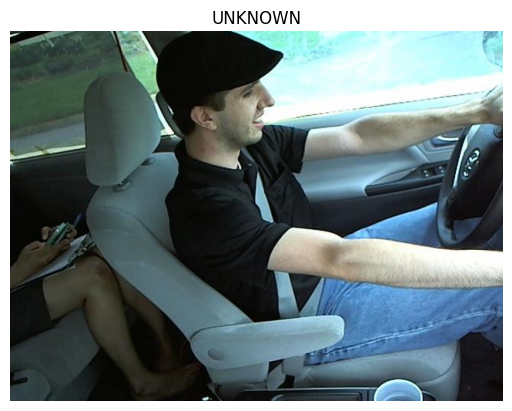

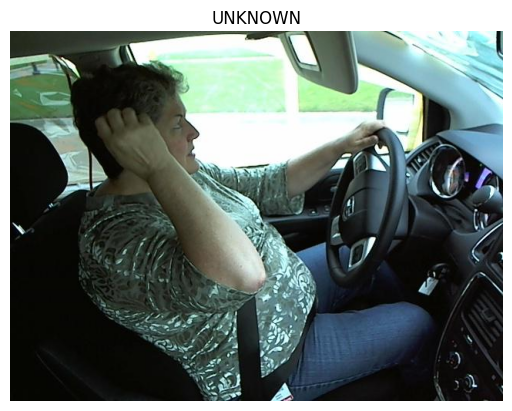

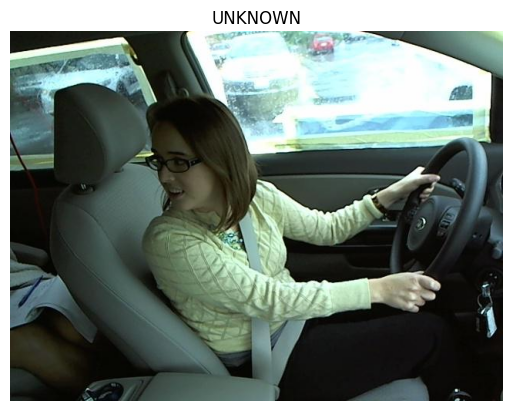

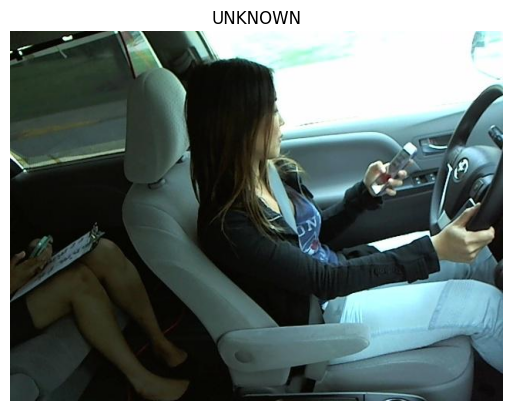

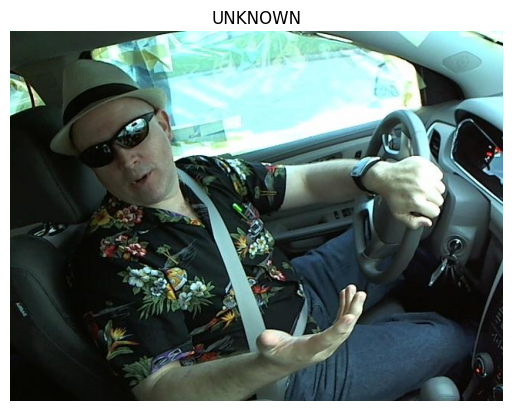

In [70]:
#/content/imgs/test
Display("/content/imgs/test/img_10.jpg")
Display("/content/imgs/test/img_100008.jpg")
Display("/content/imgs/test/img_100049.jpg")
Display("/content/imgs/test/img_100163.jpg")
Display("/content/imgs/test/img_100300.jpg")

In [72]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test=test_datagen.flow_from_directory('/content/imgs/.',classes=['test'],
                                      target_size=(256,256),
                                      batch_size=20,
                                      class_mode=None,
                                      shuffle=False)

Found 79726 images belonging to 1 classes.


In [73]:
Predict=model_copy.predict(test)

In [74]:

import os
img_names=[]
for img_name in os.listdir("/content/imgs/test"):
  img_names.append(img_name)

img_names=np.sort(img_names)

In [77]:
from PIL import Image

tags = { 0: "safe driving",
        1: "texting - right",
        2: "talking on the phone - right",
        3: "texting - left",
        4: "talking on the phone - left",
        5: "operating the radio",
        6: "drinking",
        7: "reaching behind",
        8: "hair and makeup",
        9: "talking to passenger" }

def load_images_and_labels(data_path):
  x=[]
  i=0
  for img_name in img_names:
    img=cv2.imread(data_path + '/' +img_name)
    if img is not None:
      img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img_array=Image.fromarray(img,'RGB')
      img_rs=img_array.resize((150,150))
      img_rs=np.array(img_rs)
      x.append(img_rs)
      i+=1
    if i==100:
      break
  return x

In [78]:
x=load_images_and_labels('/content/imgs/test')

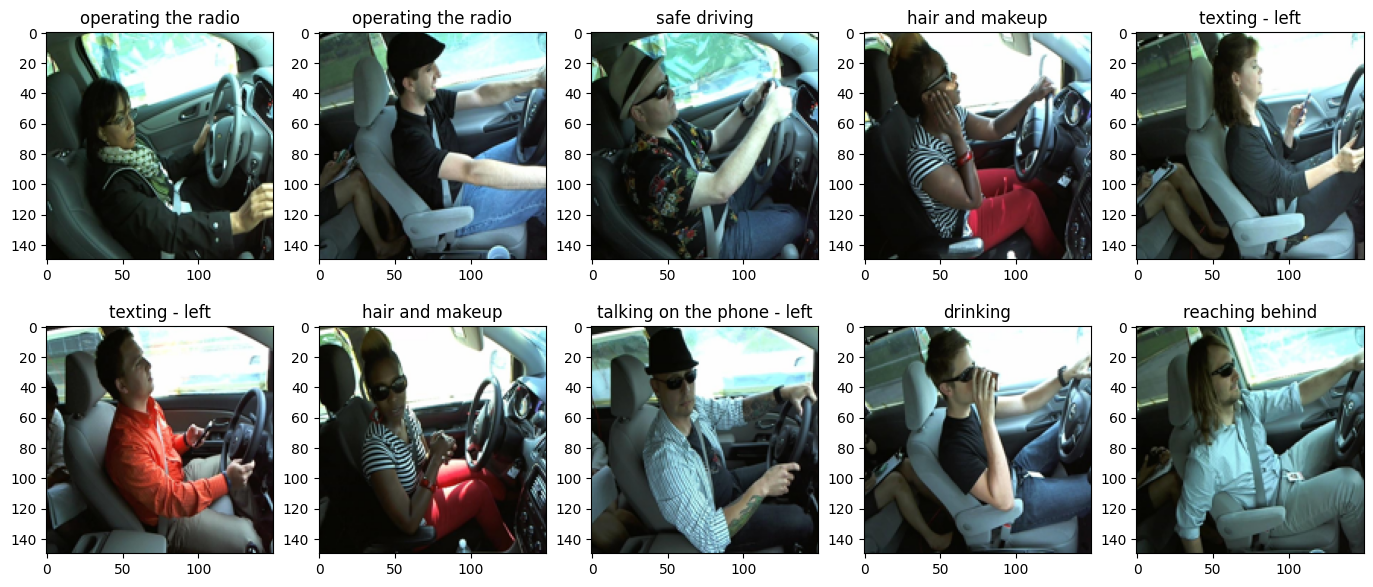

In [79]:
import random

plt.figure(figsize=(17, 7))

for i in range(0, 10, 1):
#     ind = random.randint(0, 8)
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i])
    plt.title(tags[np.argmax(Predict[i])])

In [80]:
Predict[0]
np.argmax(Predict[0])

5

In [81]:
sample_sub = pd.read_csv("/content/sample_submission.csv")
sample_sub.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [82]:
img=pd.DataFrame(img_names,columns=['img'])
img.head(20)

,img
0,img_1.jpg
1,img_10.jpg
2,img_100.jpg
3,img_1000.jpg
4,img_100000.jpg
5,img_100001.jpg
6,img_100002.jpg
7,img_100003.jpg
8,img_100004.jpg
9,img_100005.jpg


In [83]:
Pred = pd.DataFrame(Predict, columns = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])
Pred.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,6.769963e-13,2.039736e-14,3.547916e-13,6.869690e-10,4.058038e-15,1.000000e+00,1.192064e-14,5.060071e-10,2.884478e-14,1.065615e-09
1,8.283499e-05,3.883846e-05,3.153923e-04,8.716740e-05,3.818288e-05,9.987380e-01,1.810536e-04,2.323278e-04,4.645240e-05,2.397777e-04
2,9.809914e-01,3.140551e-05,2.111710e-07,5.074865e-08,1.702673e-09,3.353118e-07,4.491393e-08,3.358678e-07,9.139049e-05,1.888483e-02
3,9.284711e-10,1.604986e-12,2.371575e-10,2.094629e-14,5.475905e-18,2.511763e-17,6.980011e-14,2.288938e-12,9.999996e-01,3.117732e-07
4,1.481821e-08,5.023665e-07,1.171107e-07,9.999236e-01,2.630064e-06,4.149333e-06,7.180204e-09,7.993526e-08,6.885146e-05,5.731422e-08


In [84]:
sub = pd.concat((img, Pred), axis = 1)
sub.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,6.769963e-13,2.039736e-14,3.547916e-13,6.869690e-10,4.058038e-15,1.000000e+00,1.192064e-14,5.060071e-10,2.884478e-14,1.065615e-09
1,img_10.jpg,8.283499e-05,3.883846e-05,3.153923e-04,8.716740e-05,3.818288e-05,9.987380e-01,1.810536e-04,2.323278e-04,4.645240e-05,2.397777e-04
2,img_100.jpg,9.809914e-01,3.140551e-05,2.111710e-07,5.074865e-08,1.702673e-09,3.353118e-07,4.491393e-08,3.358678e-07,9.139049e-05,1.888483e-02
3,img_1000.jpg,9.284711e-10,1.604986e-12,2.371575e-10,2.094629e-14,5.475905e-18,2.511763e-17,6.980011e-14,2.288938e-12,9.999996e-01,3.117732e-07
4,img_100000.jpg,1.481821e-08,5.023665e-07,1.171107e-07,9.999236e-01,2.630064e-06,4.149333e-06,7.180204e-09,7.993526e-08,6.885146e-05,5.731422e-08


In [85]:
sub.columns

Index(['img', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'], dtype='object')